# Healthcare Data Science Project
This notebook focuses on analyzing cardiovascular data to predict the presence of cardiovascular diseases. We start by setting up our environment, importing necessary libraries, and loading the dataset.

In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import boxcox, skew

# DATASET FEATURES



1. Age | Objective Feature | age | int (days)
2. Height | Objective Feature | height | int (cm) |
3. Weight | Objective Feature | weight | float (kg) |
4. Gender | Objective Feature | gender | categorical code | (1- women and 2- men)
5. Systolic blood pressure | Examination Feature | ap_hi | int |
6. Diastolic blood pressure | Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking | Subjective Feature | smoke | binary |
10. Alcohol intake | Subjective Feature | alco | binary |
11. Physical activity | Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease | Target Variable | cardio | binary |

# 1. INITIAL ANALYSIS

We will start the project with importing the libraries, loading in our dataset for analysis and model building. After that we will do a high-level overview of our dataset size, its features, statistical information etc.

In [3]:
df = pd.read_csv("cardio_train.csv", delimiter=";")

In [4]:
df.head()

id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0

Lets look at the shape of our dataset using Pandas `.shape` method

In [5]:
df.shape #There are 70,000 rows in our dataset, making it highly adequate for model building

(70000, 13)

Now we will see some statistical information on our dataset's features, such as the mean, standard deviation, maximum value, minimum value etc.

In [6]:
df.describe()

id           age        gender        height        weight  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   49972.419900  19468.865814      1.349571    164.359229     74.205690   
std    28851.302323   2467.251667      0.476838      8.210126     14.395757   
min        0.000000  10798.000000      1.000000     55.000000     10.000000   
25%    25006.750000  17664.000000      1.000000    159.000000     65.000000   
50%    50001.500000  19703.000000      1.000000    165.000000     72.000000   
75%    74889.250000  21327.000000      2.000000    170.000000     82.000000   
max    99999.000000  23713.000000      2.000000    250.000000    200.000000   

              ap_hi         ap_lo   cholesterol          gluc         smoke  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean     128.817286     96.630414      1.366871      1.226457      0.088129   
std      154.011419    188.472530      0.680250      0.572270      0.283484   
min     -150.000000    -70.000000      1.000000      1.000000      0.000000   
25%      120.000000     80.000000      1.000000      1.000000      0.000000   
50%      120.000000     80.000000      1.000000      1.000000      0.000000   
75%      140.000000     90.000000      2.000000      1.000000      0.000000   
max    16020.000000  11000.000000      3.000000      3.000000      1.000000   

               alco        active        cardio  
count  70000.000000  70000.000000  70000.000000  
mean       0.053771      0.803729      0.499700  
std        0.225568      0.397179      0.500003  
min        0.000000      0.000000      0.000000  
25%        0.000000      1.000000      0.000000  
50%        0.000000      1.000000      0.000000  
75%        0.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000

Now we will examine the datatypes of our dataset, and check if there are any missing values present.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Since there are no missing values, as shown from above, we do not need to do data cleaning, since our dataset is already cleaned.

We can further confirm the existence of no missing values by using the Pandas `isnull().sum()` method, which returns the count of missing values for each column in our dataframe

In [8]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# 2. DATA PRE-PROCESSING

Before starting formal exploratory data analysis, we need to do some initial preprocessing steps on our dataset so that we can easily conduct an in-depth analysis.

---

1. We first need to divide the `age` column by 365.25 since the `age` feature is represented as the number of days. So, let's say if a person's age is 30, he would have a value of around 30*365.25 days in the `age` column approximately (since, in 1 year, there are 365 days).

In [9]:
df['age'] = df['age'] / 365.25

2. Now we will transform some specific categorical variables that are currently encoded as numerical values into their actual string representations. This conversion will enhance the interpretability and meaningful visualization of the data during exploratory data analysis (EDA). By assigning descriptive string labels to these variables, we facilitate a clearer understanding of their categorical nature, making the data more accessible and informative for analytical purposes.

In [10]:
# Create a copy of the original dataframe
df_cat_eda = df.copy()

# Encode 'Gender'
gender_mapping = {1: 'women', 2: 'men'}
df_cat_eda['gender'] = df_cat_eda['gender'].map(gender_mapping)

# Encode 'Cholesterol'
cholesterol_mapping = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
df_cat_eda['cholesterol'] = df_cat_eda['cholesterol'].map(cholesterol_mapping)

# Encode 'Glucose'
glucose_mapping = {1: 'normal', 2: 'above normal', 3: 'well above normal'}
df_cat_eda['gluc'] = df_cat_eda['gluc'].map(glucose_mapping)

# Encode 'Smoking'
smoking_mapping = {0: 'non-smoker', 1: 'smoker'}
df_cat_eda['smoke'] = df_cat_eda['smoke'].map(smoking_mapping)

# Encode 'Alcohol intake'
alcohol_mapping = {0: 'non-drinker', 1: 'drinker'}
df_cat_eda['alco'] = df_cat_eda['alco'].map(alcohol_mapping)

# Encode 'Physical activity'
activity_mapping = {0: 'inactive', 1: 'active'}
df_cat_eda['active'] = df_cat_eda['active'].map(activity_mapping)

# Encode 'Cardiovascular Disease'
cardio_mapping = {0: 'absent', 1: 'present'}
df_cat_eda['cardio'] = df_cat_eda['cardio'].map(cardio_mapping)

# Extract numerical columns
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create a new dataframe with descriptive categorical and remaining numerical features
df_cat_eda = df_cat_eda[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'] + numerical_columns]


---
From now on, we will conduct Exploratory Data Analysis (EDA) on the df_cat_eda dataframe, as it incorporates descriptive categorical labels for certain variables, enhancing the interpretability and facilitating a more insightful exploration of the dataset.
On the other hand, for all sections after EDA and data visualization, we will go back to our `df` dataframe.


# 3. EXPLORATORY DATA ANALYSIS

### TYPICAL EDA

Let's view the distribution of the `Age` feature:

In [11]:
import plotly.express as px

# Create a histogram for age distribution
fig = px.histogram(df_cat_eda, x="age", nbins=30, title="Age Distribution by Gender (1:women and 2:men)", color="gender")
fig.update_xaxes(title="Age")
fig.update_yaxes(title="Count")
fig.show()

We can see from above that age for both male and female population is more right-skewed. We can handle this skewness later during the transformation stage using appropriate data transformation techniques.



---



Now let us check the gender count in our dataset. We can see from the picture below that females are recorded much higher as compared to males.

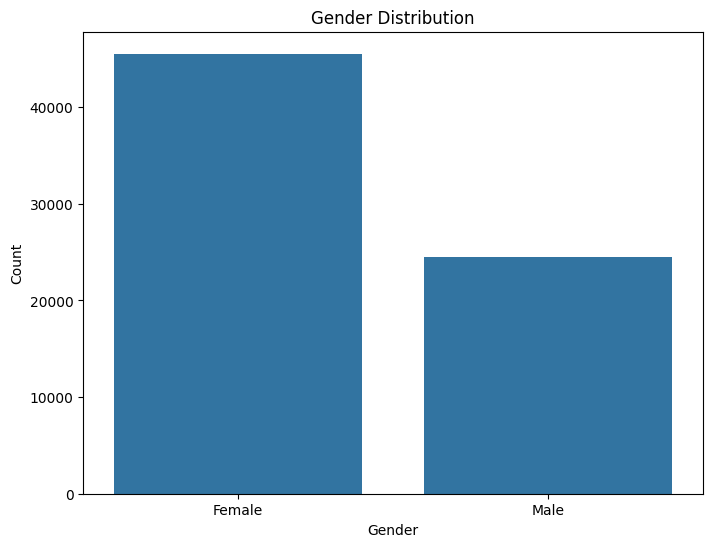

In [12]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()



---



Checking the cholesterol distribution, we can observe that around 74% of the people have normal cholesterol, while around 13% have above normal, and lastly 10% have well above normal cholesterol.

In [13]:
# Create a pie chart for cholesterol levels
cholesterol_counts = df['cholesterol'].value_counts()
fig = px.pie(values=cholesterol_counts.values, names=["Normal", "Above normal", "Well above normal"], title="Overall Cholesterol Levels Distribution ")
fig.update_traces(textinfo='percent+label')
fig.show()


Let's specifically view the cholesterol levels for patients who have a cardiovasular disease. This means we would have to filter the dataframe where the value of `cardio` column is equal to 1, indicating patients with cardiovascular disease.

In [14]:
# Filter the dataframe for diabetic patients
diabetic_df = df[df['cardio'] == 1]

# Create a pie chart for cholesterol levels in diabetic patients
cholesterol_counts_diabetic = diabetic_df['cholesterol'].value_counts()

fig = px.pie(
    values=cholesterol_counts_diabetic.values,
    names=["Normal", "Above normal", "Well above normal"],
    title="Cholesterol Levels Distribution for Diabetic Patients"
)
fig.update_traces(textinfo='percent+label')
fig.show()

Now from above, we can see that 66% of people have normal cholesterol, while 17% have above normal, and lastly 16% of people have well above normal cholesterol



---



Checking the count of people with and without any cardiovascular disease, we see that our dataset is perfectly balanced fortunately.This would prove to be helpful when training the ML models, since we would have equal number of classes

In [15]:
# Cardiovascular Disease Prevalence
cardio_prevalence = df['cardio'].value_counts(normalize=True) * 100

import plotly.express as px
import plotly.graph_objects as go

# Create a pie chart
fig = px.pie(values=cardio_prevalence, names=['No Cardio Disease', 'Cardio Disease'], title='Cardiovascular Disease Prevalence')
fig.update_traces(textinfo='percent+label')
fig.show()



---



Now we will do a comparative analysis between the number of smokers and non-smokers for both men and women.

In [16]:
import plotly.express as px
import pandas as pd

# Create a DataFrame to calculate counts of smoking status by gender
smoking_gender_counts = df.groupby(['gender', 'smoke']).size().reset_index(name='count')
smoking_gender_counts['gender'] = smoking_gender_counts['gender'].map({1: 'Women', 2: 'Male'})
smoking_gender_counts['smoke'] = smoking_gender_counts['smoke'].map({0: 'Non-Smoker', 1: 'Smoker'})

# Create a side-by-side (grouped) bar chart for smoking status and hue by gender
fig = px.bar(smoking_gender_counts, x='smoke', y='count', color='gender', barmode='group',
             labels={'smoke':'Smoking Status', 'count':'Count'}, title="Smoking Status Distribution by Gender")
fig.update_xaxes(title="Smoking Status")
fig.update_yaxes(title="Count")
fig.show()


From above graph, we can see that there is a high percentage of males that smoke as compared to women. However, if we compare generally, we can see that overall there is a less percentage of smokers as compared to non-smokers.


There are around 44K women that are non-smokers

There are around 19K men that are non-smokers

There are around 800 women that are smokers

There are around 5k men that are smokers


Now let's view the glucose levels of the patients with and without a cardiovascular disease side-by-side in a pie chart

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filter the dataframe for diabetic and non-diabetic patients
diabetic_df = df_cat_eda[df_cat_eda['cardio'] == 'present']
non_diabetic_df = df_cat_eda[df_cat_eda['cardio'] == 'absent']

# Create subplots
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Disease present', 'Disease absent'])

# Add pie chart for diabetic patients
fig.add_trace(go.Pie(labels=diabetic_df['gluc'].value_counts().index, values=diabetic_df['gluc'].value_counts().values, hole=0.3), 1, 1)

# Add pie chart for non-diabetic patients
fig.add_trace(go.Pie(labels=non_diabetic_df['gluc'].value_counts().index, values=non_diabetic_df['gluc'].value_counts().values, hole=0.3), 1, 2)

# Update layout
fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title_text='Glucose Levels Distribution for Patients with and without cardiovascular disease',
)

# Display the figure
fig.show()


From the analysis above, it becomes evident that a higher proportion of  patients with cardivascular disease that exhibit well above normal glucose levels, approximately 9%, compared to their non-diabetic counterparts, who demonstrate around 5% prevalence. Additionally, the data reveals that the percentage of individuals with normal glucose levels is notably higher among patient with no diease, standing at approximately 88%, in contrast to the approximately 81% observed among individuals with a cardiovascular disease. This discrepancy underscores the potential correlation between the `cardio` feature and elevated glucose levels, emphasizing the importance of monitoring and managing blood glucose levels in individuals with such heart diseases.








---



Now we will visualize the distribution of patients with and without heart disease, by grouping the age for each patient into a specifc group and then furhter grouping the dataframe for each age group based on the presence of heart disease. We will then visualize the resulting dataframe in a barplot.

In [18]:
df_cat_eda['age_group'] = pd.cut(df_cat_eda['age'], bins=[30, 40, 50, 60, 70, 80], labels=['30-39', '40-49', '50-59', '60-69', '70-79'])

age_group_counts = df_cat_eda.groupby(['age_group', 'cardio']).size().reset_index(name='count')


In [19]:

# Create a grouped bar chart with Plotly
fig = px.bar(age_group_counts, x='age_group', y='count', color='cardio',
             labels={'count': 'Count', 'age_group': 'Age Group', 'cardio': 'Cardiovascular Disease'},
             title='Number of People with and without Cardiovascular Diseases for Different Age Groups',
             barmode='group')  # Set barmode to 'group' for side-by-side bars

# Show the figure
fig.show()


The graph above shows that there is a higher number of patients with a heart disease above the ages of 40, specifically for 50-60 years old. However, we can also see that there is also a high number of patients without heart disease for this range. Therefore, we can assume that there isnt much data available for the age range of 40 and below, so we can't make alot of inferences for that age range.



---



Now we will calculate the avereage systolic and diastolic blood pressure for the patients and hue it by the presence of cardiovasascular disease

In [20]:
# Calculate average blood pressure by cardio status
avg_bp_by_cardio = df_cat_eda.groupby('cardio').agg({'ap_hi': 'mean', 'ap_lo': 'mean'}).reset_index()

# Bar chart for average blood pressure by cardio status
fig_avg_bp = px.bar(avg_bp_by_cardio, x='cardio', y=['ap_hi', 'ap_lo'],
                    labels={'value': 'Average Blood Pressure', 'variable': 'Blood Pressure Component'},
                    title='Average Systolic and Diastolic Blood Pressure by Cardio Status', barmode='group')
fig_avg_bp.show()


**Systolic Blood Pressure (ap_hi):**

1. For individuals without cardiovascular disease (absent), the average systolic blood pressure is around 120.43 mmHg.

2. For individuals with cardiovascular disease (present), the average systolic blood pressure is higher, around 137.21 mmHg.

3. The difference in average systolic blood pressure between the two groups suggests that individuals with cardiovascular disease tend to have elevated systolic blood pressure compared to those without.

**Diastolic Blood Pressure (ap_lo):**

1. For individuals without cardiovascular disease (absent), the average diastolic blood pressure is around 84.25 mmHg.

2. For individuals with cardiovascular disease (present), the average diastolic blood pressure is higher, around 109.02 mmHg.

3. The difference in average diastolic blood pressure between the two groups indicates that individuals with cardiovascular disease tend to have elevated diastolic blood pressure compared to those without.




---



### CORELATION ANALYSIS


In [21]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [22]:
df.drop("id", axis=1, inplace=True)

Below we will create a heatmap to checkout the correlation between the independent numeric variables. We are doing this to identify multi-collinearity between independent features.

Creating a heatmap to examine the correlation between independent numeric variables is a crucial step in identifying multicollinearity. Multicollinearity arises when two or more independent variables in a regression model exhibit high correlation, posing challenges in isolating the individual impact of each variable on the dependent variable. This phenomenon introduces instability and unreliability into the model.



In [23]:
import plotly.figure_factory as ff

numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Calculate the correlation matrix
correlation_matrix = df_cat_eda[numerical_columns].corr()

# Define colors for positive, negative, and no correlation
colorscale = [
    [0, '#3283FE'],  # Positive correlation color
    [0.5, '#FFFFFF'],  # No correlation color
    [1, '#D64933']  # Negative correlation color
]

# Create an annotated heatmap
fig_heatmap = ff.create_annotated_heatmap(z=correlation_matrix.values,
                                          x=list(correlation_matrix.columns),
                                          y=list(correlation_matrix.index),
                                          colorscale=colorscale,
                                          annotation_text=correlation_matrix.round(2).values,
                                          showscale=True)

# Update layout for better visualization
fig_heatmap.update_layout(title='Correlation Heatmap',
                          xaxis=dict(title='Features'),
                          yaxis=dict(title='Features'),
                          margin=dict(l=30, r=30, t=80, b=80),
                          height=500, width=700)

# Show the figure
fig_heatmap.show()


Fortunately, there is very less correlation between the indepenedent variables, which means we can use them for modeling later without doing transformations on them.



---



**Since now we are approaching the modeling phase, so we will siwtch back to the original dataframe `df`, instead of `df_cat_eda`. This is because the orignal dataframe has all ca features, while the `df_cat_eda` has string-encoded categorical features.**

### OUTLIER DETECTION AND HANDLING USING WINSORIZATION TECHNIQUE

Now we will draw boxplots for each of the numerical columns to view their outlier distribution.

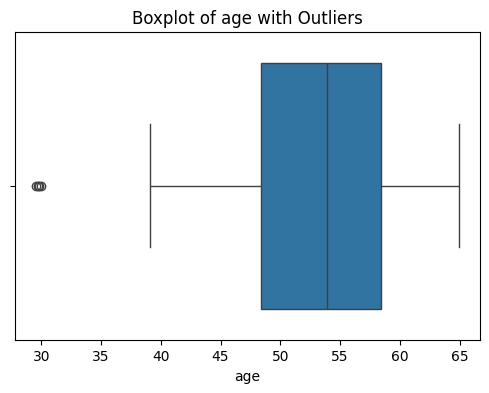

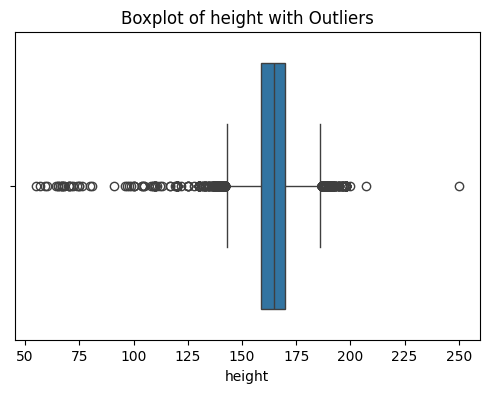

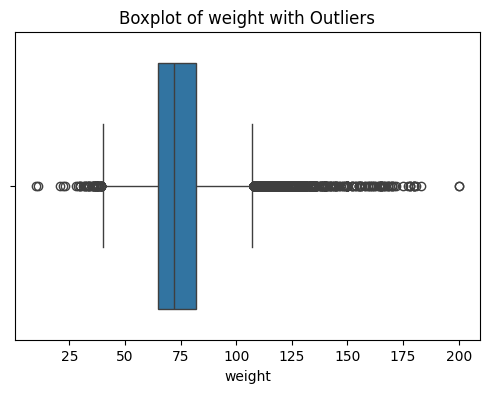

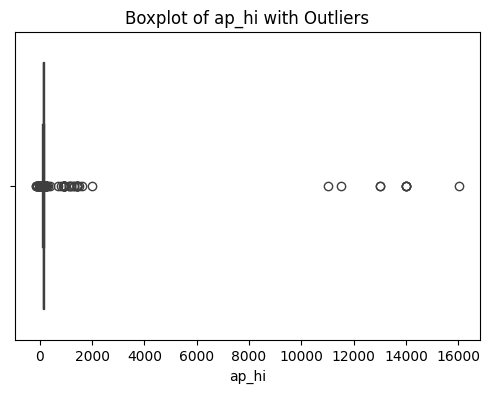

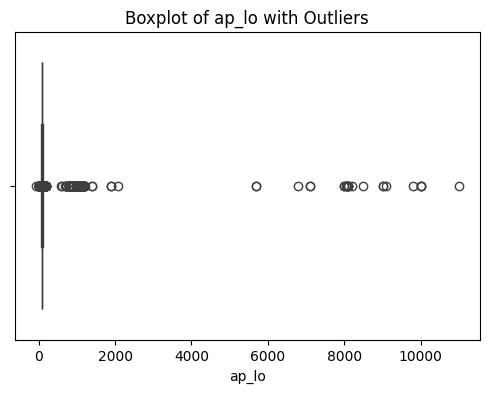

In [24]:
# Define the numerical columns
numerical_columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Create boxplots for columns with outliers
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} with Outliers')
    plt.show()


To further understand the number of outliers, let us count them for each numeric column using the IQR method

In [25]:
# Function to count outliers using IQR method
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = len(data[(data[column] < lower_bound) | (data[column] > upper_bound)])
    return outliers_count

# Dictionary to store outlier counts for each numeric feature
outliers_count_dict = {}

# Count outliers for each numeric column
for column in numerical_columns:
    outliers_count_dict[column] = count_outliers_iqr(df, column)

# Display the number of outliers for each numeric feature
for column, count in outliers_count_dict.items():
    print(f'Number of outliers in {column}: {count}')


Number of outliers in age: 4
Number of outliers in height: 519
Number of outliers in weight: 1819
Number of outliers in ap_hi: 1435
Number of outliers in ap_lo: 4632


Now we are going to use the Winsorization technique to minimize the overall impact of outliers on our dataset.

We are keeping a lower limit of 5 percentile. This means that all values that are below the 5 percentile, will be replaced by the value at the 5th percentile. Similarly, we are keeping an upper limit of 95 percentile. This means that all values beyond this will be replace by the value at the 95th percentile. This will help us mitigate the overall influence on the outliers present in the dataset.

In [26]:
import pandas as pd
from scipy.stats.mstats import winsorize

# Select numerical columns
numerical_columns = df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']]

# Apply Winsorization to each numerical column
for column in numerical_columns.columns:
    df[column] = winsorize(df[column], limits=[0.05, 0.05])


Now again plotting the columns to view the outliers, we can see that there are no outliers in our dataset.

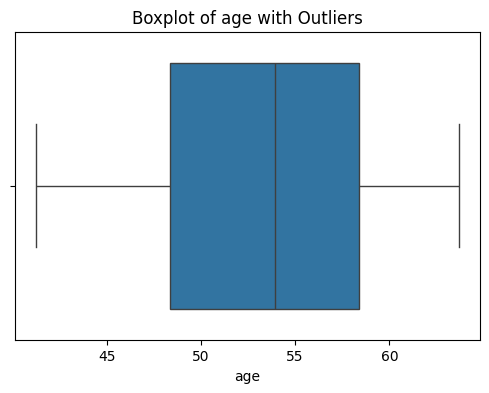

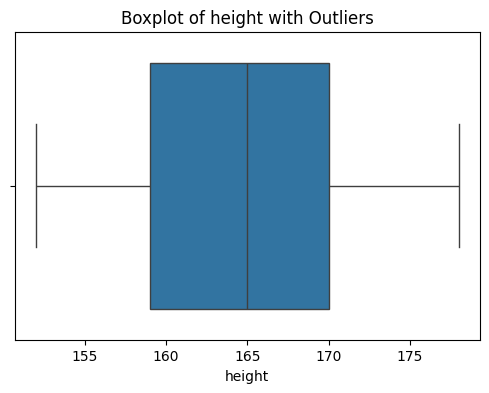

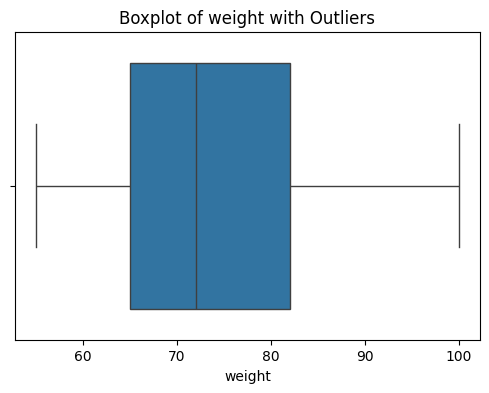

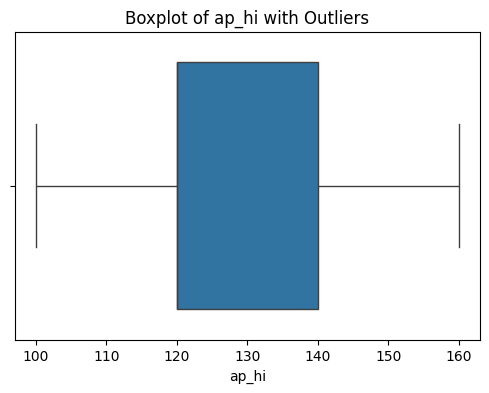

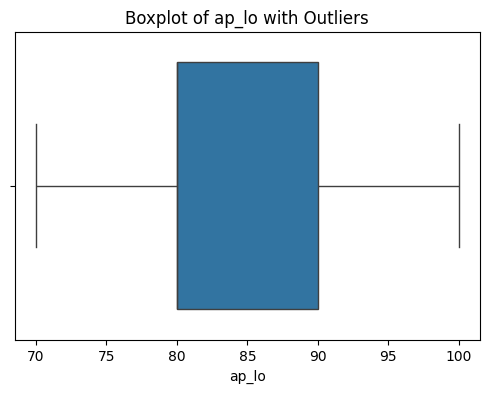

In [27]:
# Create boxplots for columns with outliers
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column} with Outliers')
    plt.show()

# 4. FEATURE ENGINEERING AND TRANSFORMATIONS

### 4.1. DATA TRANSFORMATIONS

Now we will be doing a thorough analysis of the distirbution of data, apply various transformations, and determine which transformation brings us most close to normal distribution for each feature.

**Achieving a normal distribution of features is essential for optimizing the performance and interpretability of models like XGBoost, AdaBoost, and Random Forests. Balanced decision boundaries are critical for distinguishing between classes, and transforming skewed features contributes to creating more equitable representations. By mitigating the effects of class imbalance and enhancing discriminative power, feature transformations ensure that the model focuses on informative ranges of values. Furthermore, normalizing features helps in stabilizing the model training process, making it more robust to outliers and facilitating convergence in iterative optimization algorithms. This approach ultimately leads to improved accuracy, reliability, and interpretability in the classification task.**

The code below applies log, square root, reciprocal, and box cox transform on the `age` column. It then plot the original age column, and the transformed age columns side by side using seaborn's histplot method. It also calculate the skewness for each transformation using the skew method of pandas and displays it in each transformation's graph.

The output is a graph containing the distribution for the transformation with a skew measure for that transformation.

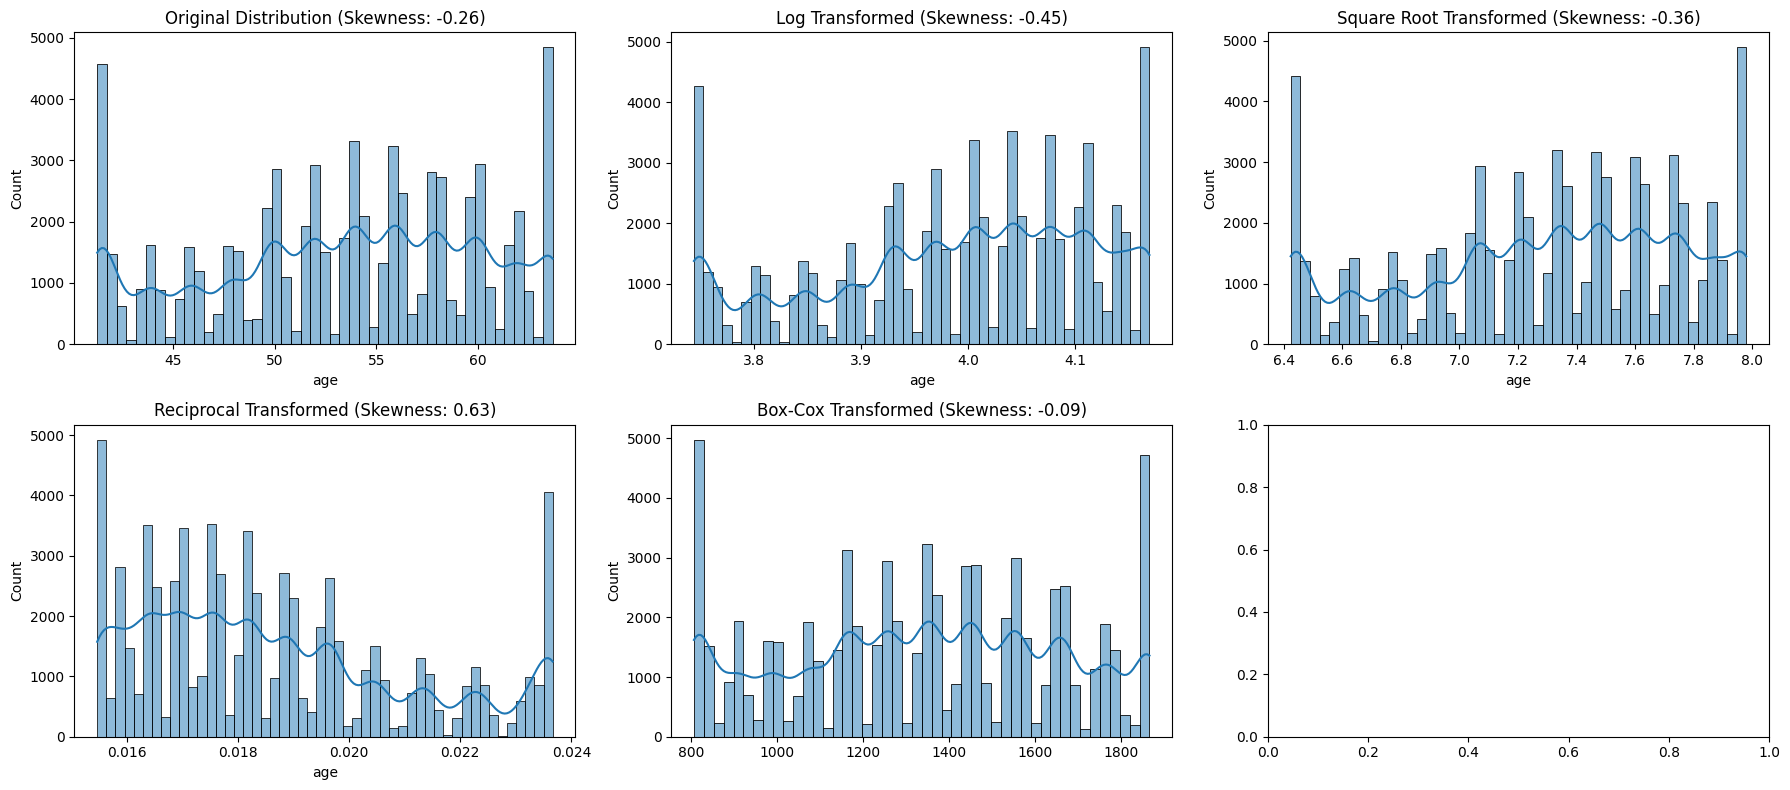

In [28]:
from scipy.stats import boxcox, skew

age_data = df['age']

# Apply transformations
log_transformed_age= np.log1p(age_data)
sqrt_transformed_age = np.sqrt(age_data)
reciprocal_transformed_age = 1 / (age_data + 1)  # Adding 1 to handle zero values if present
boxcox_transformed_age, _ = boxcox(age_data + 1)  # Adding 1 to handle zero values if present

# Calculate skewness for each transformation
skewness_original = skew(age_data)
skewness_log = skew(log_transformed_age)
skewness_sqrt = skew(sqrt_transformed_age)
skewness_reciprocal = skew(reciprocal_transformed_age)
skewness_boxcox = skew(boxcox_transformed_age)

# Plot the original and transformed distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Original distribution with skewness
sns.histplot(age_data, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'Original Distribution (Skewness: {skewness_original:.2f})')

# Log transformation with skewness
sns.histplot(log_transformed_age, kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Log Transformed (Skewness: {skewness_log:.2f})')

# Square root transformation with skewness
sns.histplot(sqrt_transformed_age, kde=True, ax=axes[0, 2])
axes[0, 2].set_title(f'Square Root Transformed (Skewness: {skewness_sqrt:.2f})')

# Reciprocal transformation with skewness
sns.histplot(reciprocal_transformed_age, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'Reciprocal Transformed (Skewness: {skewness_reciprocal:.2f})')

# Box-Cox transformation with skewness
sns.histplot(boxcox_transformed_age, kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f'Box-Cox Transformed (Skewness: {skewness_boxcox:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()


Similarly, we are going to do this for all other numeric features

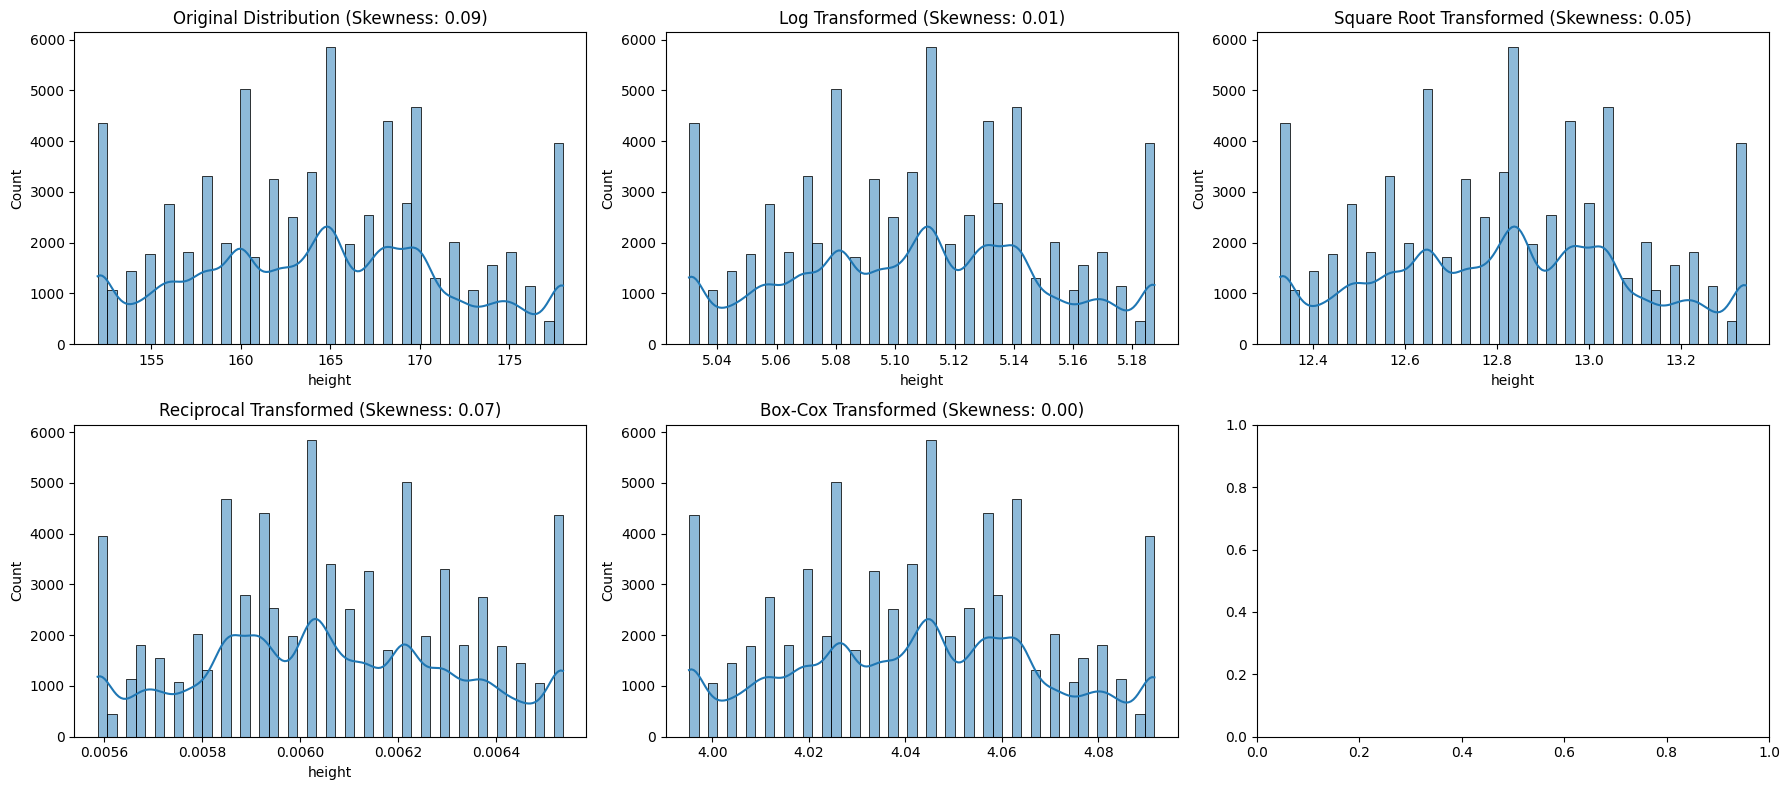

In [29]:
from scipy.stats import boxcox, skew

age_data = df['height']

# Apply transformations
log_transformed_height = np.log1p(age_data)
sqrt_transformed_height = np.sqrt(age_data)
reciprocal_transformed_height = 1 / (age_data + 1)  # Adding 1 to handle zero values if present
boxcox_transformed_height, _ = boxcox(age_data + 1)  # Adding 1 to handle zero values if present

# Calculate skewness for each transformation
skewness_original = skew(age_data)
skewness_log = skew(log_transformed_height)
skewness_sqrt = skew(sqrt_transformed_height)
skewness_reciprocal = skew(reciprocal_transformed_height)
skewness_boxcox = skew(boxcox_transformed_height)

# Plot the original and transformed distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Original distribution with skewness
sns.histplot(age_data, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'Original Distribution (Skewness: {skewness_original:.2f})')

# Log transformation with skewness
sns.histplot(log_transformed_height, kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Log Transformed (Skewness: {skewness_log:.2f})')

# Square root transformation with skewness
sns.histplot(sqrt_transformed_height, kde=True, ax=axes[0, 2])
axes[0, 2].set_title(f'Square Root Transformed (Skewness: {skewness_sqrt:.2f})')

# Reciprocal transformation with skewness
sns.histplot(reciprocal_transformed_height, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'Reciprocal Transformed (Skewness: {skewness_reciprocal:.2f})')

# Box-Cox transformation with skewness
sns.histplot(boxcox_transformed_height, kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f'Box-Cox Transformed (Skewness: {skewness_boxcox:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()


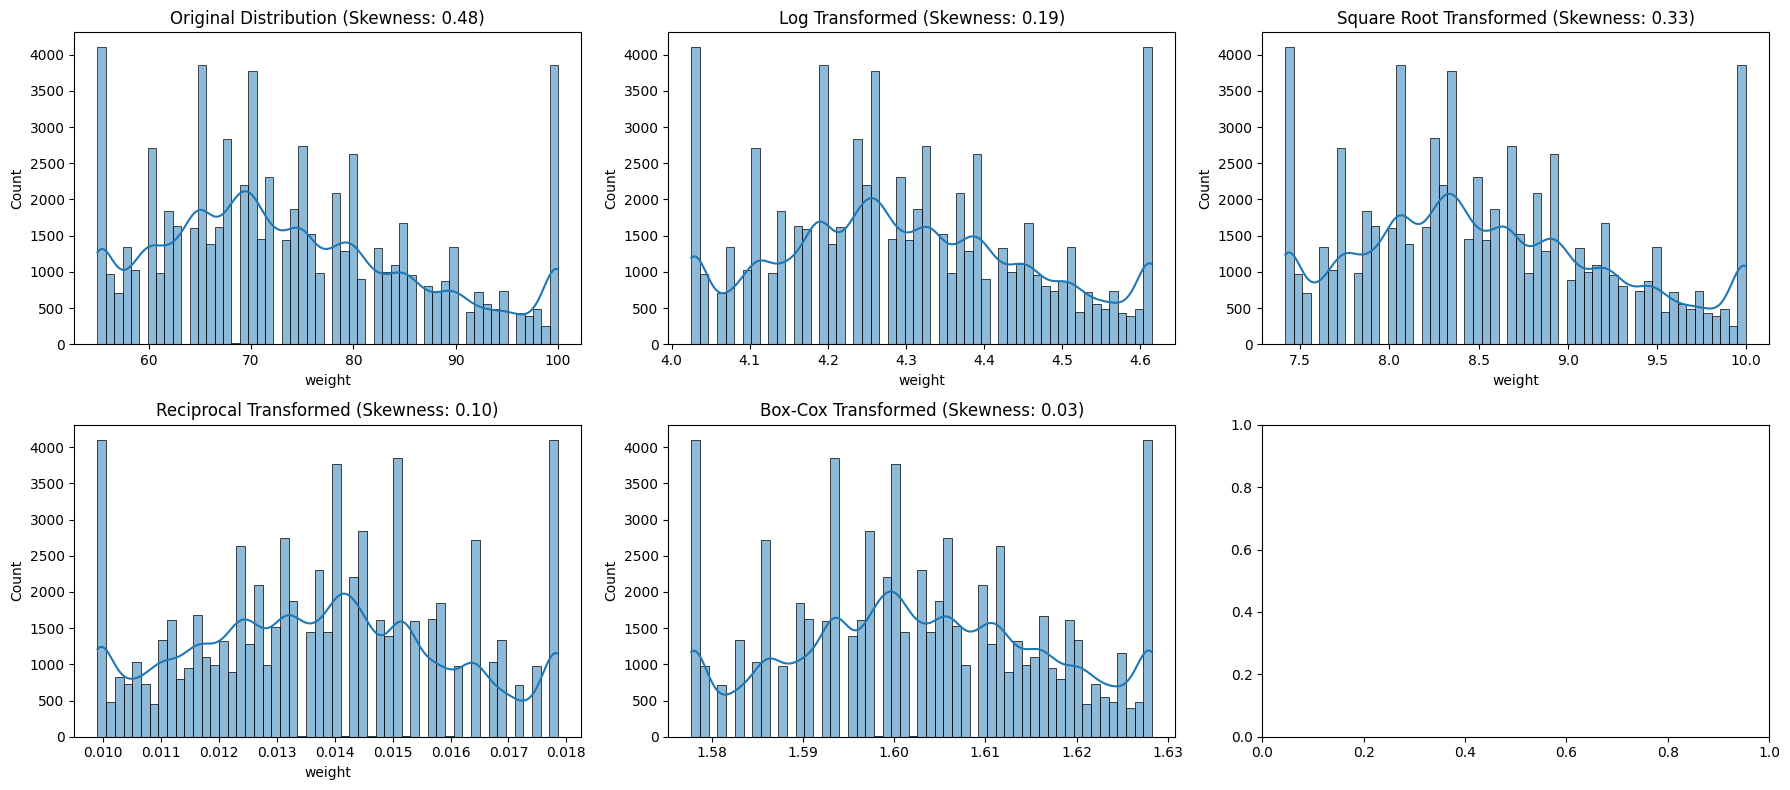

In [30]:
from scipy.stats import boxcox, skew

age_data = df['weight']

# Apply transformations
log_transformed_weight = np.log1p(age_data)
sqrt_transformed_weight = np.sqrt(age_data)
reciprocal_transformed_weight = 1 / (age_data + 1)  # Adding 1 to handle zero values if present
boxcox_transformed_weight, _ = boxcox(age_data + 1)  # Adding 1 to handle zero values if present

# Calculate skewness for each transformation
skewness_original = skew(age_data)
skewness_log = skew(log_transformed_weight)
skewness_sqrt = skew(sqrt_transformed_weight)
skewness_reciprocal = skew(reciprocal_transformed_weight)
skewness_boxcox = skew(boxcox_transformed_weight)

# Plot the original and transformed distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Original distribution with skewness
sns.histplot(age_data, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'Original Distribution (Skewness: {skewness_original:.2f})')

# Log transformation with skewness
sns.histplot(log_transformed_weight, kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Log Transformed (Skewness: {skewness_log:.2f})')

# Square root transformation with skewness
sns.histplot(sqrt_transformed_weight, kde=True, ax=axes[0, 2])
axes[0, 2].set_title(f'Square Root Transformed (Skewness: {skewness_sqrt:.2f})')

# Reciprocal transformation with skewness
sns.histplot(reciprocal_transformed_weight, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'Reciprocal Transformed (Skewness: {skewness_reciprocal:.2f})')

# Box-Cox transformation with skewness
sns.histplot(boxcox_transformed_weight, kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f'Box-Cox Transformed (Skewness: {skewness_boxcox:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()


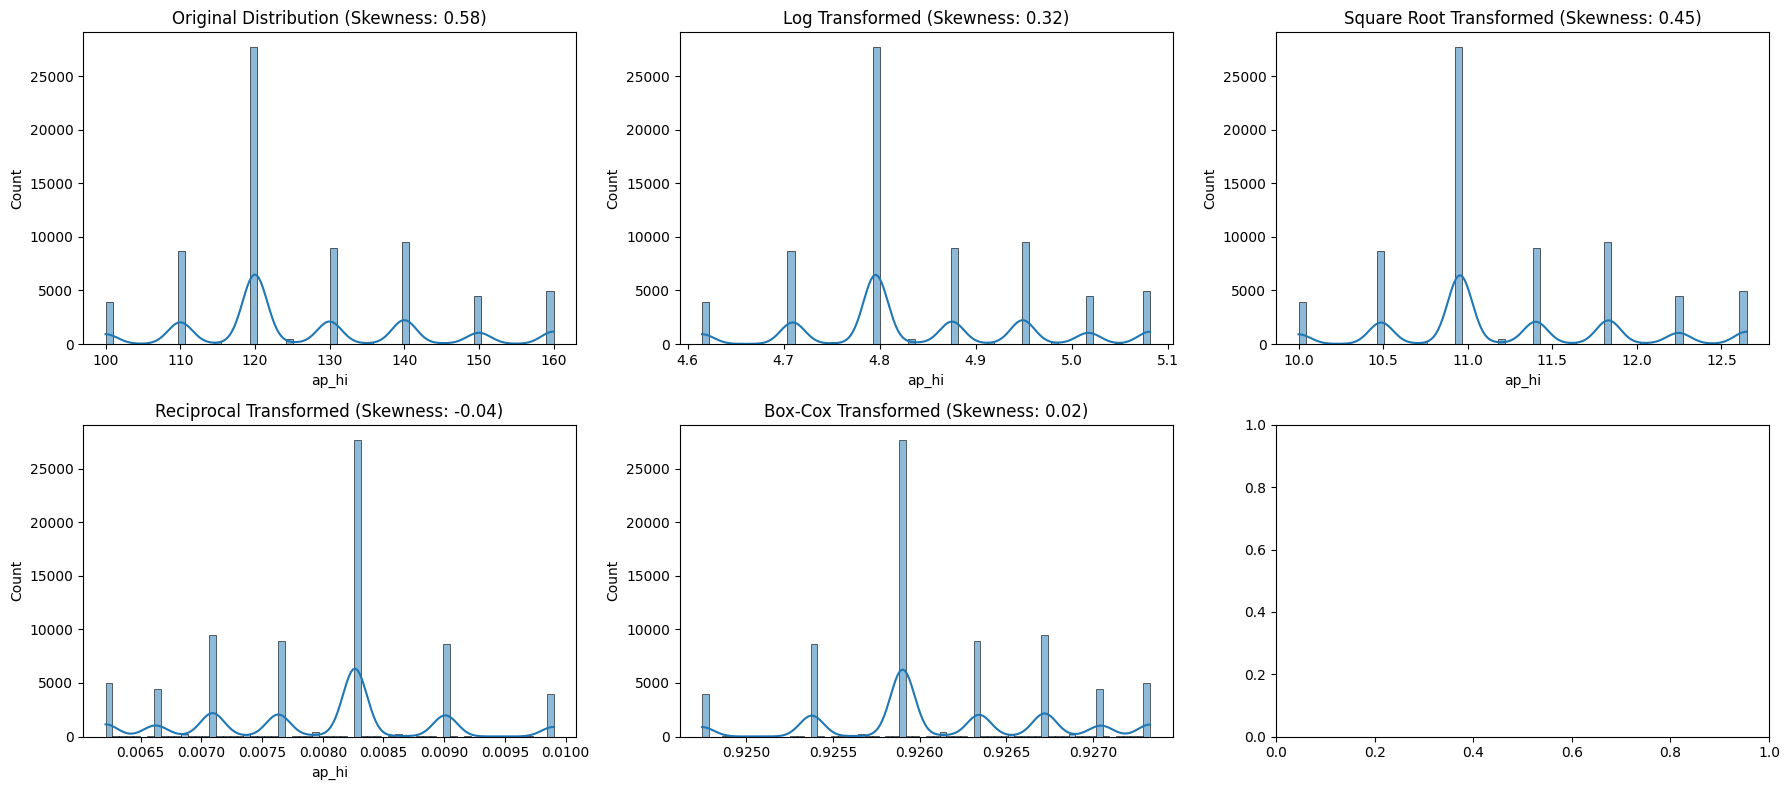

In [31]:
from scipy.stats import boxcox, skew

age_data = df['ap_hi']

# Apply transformations
log_transformed_hi = np.log1p(age_data)
sqrt_transformed_hi = np.sqrt(age_data)
reciprocal_transformed_hi = 1 / (age_data + 1)  # Adding 1 to handle zero values if present
boxcox_transformed_hi, _ = boxcox(age_data + 1)  # Adding 1 to handle zero values if present

# Calculate skewness for each transformation
skewness_original = skew(age_data)
skewness_log = skew(log_transformed_hi)
skewness_sqrt = skew(sqrt_transformed_hi)
skewness_reciprocal = skew(reciprocal_transformed_hi)
skewness_boxcox = skew(boxcox_transformed_hi)

# Plot the original and transformed distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Original distribution with skewness
sns.histplot(age_data, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'Original Distribution (Skewness: {skewness_original:.2f})')

# Log transformation with skewness
sns.histplot(log_transformed_hi, kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Log Transformed (Skewness: {skewness_log:.2f})')

# Square root transformation with skewness
sns.histplot(sqrt_transformed_hi, kde=True, ax=axes[0, 2])
axes[0, 2].set_title(f'Square Root Transformed (Skewness: {skewness_sqrt:.2f})')

# Reciprocal transformation with skewness
sns.histplot(reciprocal_transformed_hi, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'Reciprocal Transformed (Skewness: {skewness_reciprocal:.2f})')

# Box-Cox transformation with skewness
sns.histplot(boxcox_transformed_hi, kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f'Box-Cox Transformed (Skewness: {skewness_boxcox:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()


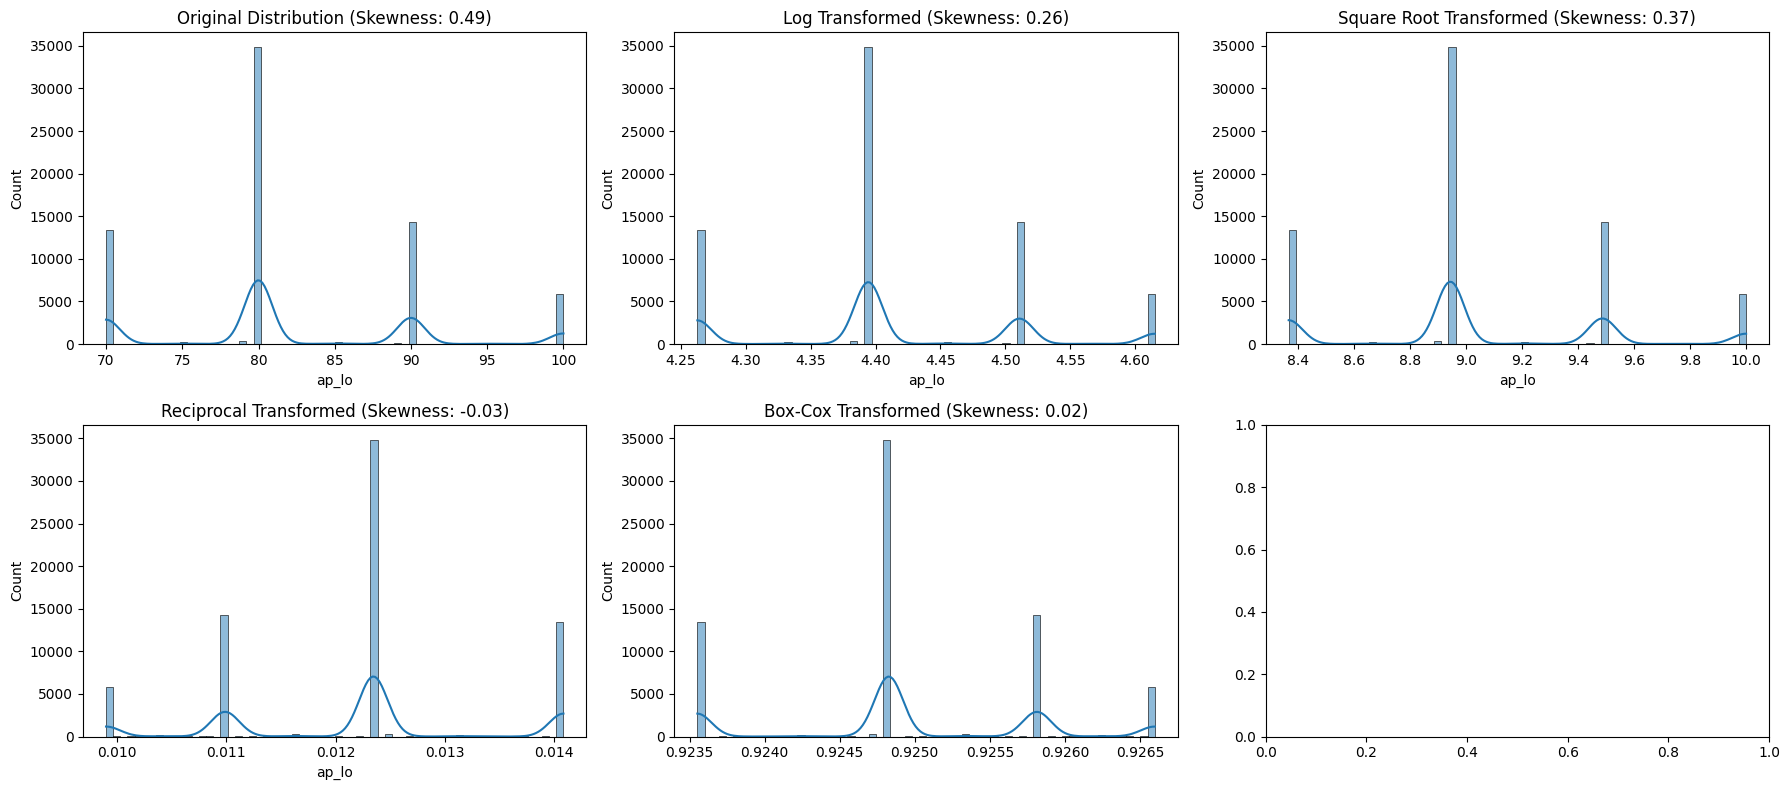

In [32]:
from scipy.stats import boxcox, skew

age_data = df['ap_lo']

# Apply transformations
log_transformed_lo = np.log1p(age_data)
sqrt_transformed_lo = np.sqrt(age_data)
reciprocal_transformed_lo = 1 / (age_data + 1)  # Adding 1 to handle zero values if present
boxcox_transformed_lo, _ = boxcox(age_data + 1)  # Adding 1 to handle zero values if present

# Calculate skewness for each transformation
skewness_original = skew(age_data)
skewness_log = skew(log_transformed_lo)
skewness_sqrt = skew(sqrt_transformed_lo)
skewness_reciprocal = skew(reciprocal_transformed_lo)
skewness_boxcox = skew(boxcox_transformed_lo)

# Plot the original and transformed distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 8))

# Original distribution with skewness
sns.histplot(age_data, kde=True, ax=axes[0, 0])
axes[0, 0].set_title(f'Original Distribution (Skewness: {skewness_original:.2f})')

# Log transformation with skewness
sns.histplot(log_transformed_lo, kde=True, ax=axes[0, 1])
axes[0, 1].set_title(f'Log Transformed (Skewness: {skewness_log:.2f})')

# Square root transformation with skewness
sns.histplot(sqrt_transformed_lo, kde=True, ax=axes[0, 2])
axes[0, 2].set_title(f'Square Root Transformed (Skewness: {skewness_sqrt:.2f})')

# Reciprocal transformation with skewness
sns.histplot(reciprocal_transformed_lo, kde=True, ax=axes[1, 0])
axes[1, 0].set_title(f'Reciprocal Transformed (Skewness: {skewness_reciprocal:.2f})')

# Box-Cox transformation with skewness
sns.histplot(boxcox_transformed_lo, kde=True, ax=axes[1, 1])
axes[1, 1].set_title(f'Box-Cox Transformed (Skewness: {skewness_boxcox:.2f})')

# Adjust layout
plt.tight_layout()
plt.show()


Now based on above graphs, following are the selected features with justification:

1. For the age feature, we are selecting box cox transformation because it makes the data most close to normal distribution. Moreover, the skew value of -0.09 indicates that the data is symmetric and has very less skewness, as compared to the skew value of -0.29 (of the original distribution).

2. For the height feature, we are also selecting box cox transformation because it makes the data most close to normal distribution. Moreover, the skew value of 0.00 indicates that the data is symmetric and has no skewness, as compared to the skew value of 0.09 (of the original distribution).

3. For the weight feature, we are again selecting box cox transformation because it makes the data most close to normal distribution. Moreover, the skew value of 0.03 indicates that the data is symmetric and has very less skewness, as compared to the positively skew value of 0.48 (of the original distribution).

4. For the ap_hi feature, we are again selecting box cox transformation because it makes the data most close to normal distribution. Moreover, the skew value of 0.02 indicates that the data is symmetric and has very less skewness, as compared to the positively skew value of 0.58 (of the original distribution).

5. For the ap_hi feature, we are again selecting box cox transformation because it makes the data most close to normal distribution. Moreover, the skew value of 0.02 indicates that the data is symmetric and has very less skewness, as compared to the positively skew value of 0.49 (of the original distribution).

In [33]:
df['age'] = boxcox_transformed_age
df['height'] = boxcox_transformed_height
df['weight'] = boxcox_transformed_weight
df['ap_hi'] = boxcox_transformed_hi
df['ap_lo'] = boxcox_transformed_lo

### 4.2 FEATURE ENGINEERING

Now we will create different features using our existing dataset. These feature engineering steps aim to enrich the dataset with informative features that may improve the predictive power of models in the context of cardiovascular health.







In [34]:
from sklearn.preprocessing import PolynomialFeatures

1. The code below calculates the Body Mass Index (BMI) for each individual in the dataset. BMI is a common metric used to assess body weight in relation to height, providing insights into potential obesity, which is a known risk factor for cardiovascular diseases.

In [35]:
# Feature Engineering - BMI
df['bmi'] = df['weight'] / (df['height'] / 100) ** 2


2. The Pulse Pressure is computed by subtracting the diastolic blood pressure (ap_lo) from the systolic blood pressure (ap_hi). Pulse Pressure is an indicator of arterial stiffness and can offer insights into cardiovascular health.

In [36]:
# Feature Engineering - Pulse Pressure
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']


3. This section creates interaction terms between age and both systolic and diastolic blood pressure. It aims to capture potential age-specific effects of blood pressure on cardiovascular health.

In [37]:
# Feature Engineering - Age and Blood Pressure Interaction
df['age_ap_hi_interaction'] = df['age'] * df['ap_hi']
df['age_ap_lo_interaction'] = df['age'] * df['ap_lo']


4. This part introduces an interaction term between cholesterol and glucose levels, recognizing their combined impact on cardiovascular disease development.

In [38]:
# Feature Engineering - Cholesterol and Glucose Level Interaction
df['cholesterol_glucose_interaction'] = df['cholesterol'] * df['gluc']


5. A composite score is created by summing up the lifestyle risk factors, including smoking, alcohol intake, and physical activity. This score aims to provide a holistic view of lifestyle-related cardiovascular risks.

In [39]:
# Feature Engineering - Lifestyle Risk Factor Score
df['lifestyle_risk_score'] = df['smoke'] + df['alco'] + df['active']


6. An additional interaction term is created by multiplying systolic and diastolic blood pressure. This interaction term might provide insights into combined effects on cardiovascular health.

In [40]:
# Feature Engineering - Interaction Term
df['bp_product'] = df['ap_hi'] * df['ap_lo']


# 5. TRAIN TEST SPLIT

Now we will select our target feature and pass it in, alongwith the input features to sklearn method, which will give us our training and testing dataset. We kept the size of test dataset to be 25% of the original dataset, while training set is of 75%.

In [41]:

from sklearn.model_selection import train_test_split

X = df.drop(['cardio'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

# 6. Model Building, Training, Testing, and Evaluation

In this section, we wil be training our models on the dataset. For this research question, there are 3 models we selected:

1. Random Forest: Random Forest is chosen for its ability to handle complex relationships and capture non-linear patterns in the data. It is an ensemble of decision trees, and each tree is trained on a random subset of features and observations. This randomness and diversity among trees make Random Forest robust against overfitting and noise, which is valuable when dealing with a diverse range of features and potential interactions in our dataset.

2. AdaBoost: AdaBoost is well-suited for our task due to its adaptive boosting technique. It sequentially builds a series of weak learners, giving more weight to misclassified samples in each iteration. This adaptive nature allows AdaBoost to focus on difficult-to-classify instances, making it effective in situations where the dataset has imbalanced classes or complex decision boundaries. It is particularly useful for enhancing the model's performance by addressing misclassifications effectively.

3. XGBoost: XGBoost is a powerful gradient boosting algorithm known for its speed and efficiency. It sequentially builds a series of decision trees, each correcting the errors of the previous one. XGBoost excels in handling large datasets, and its regularization techniques help prevent overfitting. Additionally, XGBoost provides advanced features such as parallel processing, tree pruning, and handling missing values, making it a versatile choice for improving accuracy and efficiency in our classification task.


</br>
</br>
</br>

---





**<u>OVERVIEW OF THE TRAINING PROCESS</u>**

For each type of model, we perform the following steps:
1. <i>The process begins by first instantiating the model with a fixed random state. We then define a dictionary of parameters that will be used for hyper-parameter tuning of the model. After that, we employ RandomizedSearchCV to efficiently explore a subset of hyperparameter combinations. It performs cross-validated grid search to find the best hyperparameters based on the specified scoring metric (accuracy in this case) and ensures the model's robustness.</i>

2. <i>After doing hyper-parameter tuning, we then extract the best parameters from the model, and then again instantiate the model with those best parameters. We then train the model on our training dataset and then make predictions on the test dataset.</i>

3. <i>Lastly, we print out a classification report, a confusion matrix, roc-auc score, and also plot the confusion matrix in a graphical format.</i>



---



**<u>OVERVIEW OF METRICS USED</u>**

Precision, recall, F1 score, and ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) are metrics commonly used in machine learning and statistics to evaluate the performance of classification models. Each metric provides a different perspective on the model's ability to make accurate predictions, and they are often used in conjunction to get a comprehensive understanding of a model's performance.

1.  <i>Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives.
It is a measure of the accuracy of the positive predictions made by the model.
Precision is particularly important when the cost of false positives is high.
Formula: Precision = TP / (TP + FP) </i>

2. <i>Recall (Sensitivity or True Positive Rate): Recall is the ratio of correctly predicted positive observations to the total actual positives.
It measures the ability of the model to capture all the positive instances.
Recall is important when the cost of false negatives is high.
Formula: Recall = TP / (TP + FN)</i>

3. <i>F1 Score: The F1 score is the harmonic mean of precision and recall. It provides a balanced measure that considers both false positives and false negatives.
It is especially useful when there is an uneven class distribution.
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)</i>

4. <i>ROC-AUC (Receiver Operating Characteristic - Area Under the Curve): ROC-AUC is a metric used for binary classification problems to evaluate the trade-off between sensitivity (true positive rate) and specificity (true negative rate).
It plots the true positive rate against the false positive rate for different thresholds.
The AUC represents the area under the ROC curve, and a higher AUC indicates better model performance.
ROC-AUC is useful when there is a need to understand the model's ability to discriminate between positive and negative classes across different probability thresholds.</i>



---




## 6.1. Model Evaluation and Visualisation

In [42]:
# Import Libraries

from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    precision_recall_curve, auc, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import logging
import json
import pandas as pd
import numpy as np

logging.basicConfig(level=logging.INFO)

title_map = {"random_forests": "Random Forests", "adaboost": "AdaBoost", "xgboost": "XGBoost"}

### 6.1.1. Evaluation Classification Function

In [43]:
def evaluate_classification_metrics(y_true, y_pred, proba_pred=None):
    """
    Evaluate classification metrics including precision, recall, F1-score, and ROC-AUC.
    Convert any NumPy arrays to lists for JSON serialization.
    """
    logging.info("Evaluating classification metrics...")
    
    metrics = {
        'classification_report': classification_report(y_true, y_pred, digits=4),
    }

    # Ensure confusion matrix has all values
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    metrics['confusion_matrix'] = cm.tolist()  # Convert to list
    
    if proba_pred is not None:
        logging.info("Calculating ROC-AUC and precision-recall AUC...")
        metrics['roc_auc_score'] = roc_auc_score(y_true, proba_pred)
        precision, recall, _ = precision_recall_curve(y_true, proba_pred)
        metrics['precision_recall_auc'] = auc(recall, precision)
        fpr, tpr, _ = roc_curve(y_true, proba_pred)
        metrics['roc_curve'] = {'fpr': fpr.tolist(), 'tpr': tpr.tolist()}  # Convert to list

    return metrics

### 6.1.3. Evaluation Function

In [44]:
def evaluate_model(model, X_test, y_test, model_name, save_metrics=True):
    """
    Evaluate the model on the provided test data and labels. Enhanced for robust error handling with logging.
    """
    logging.info("Predicting using the model...")
    y_pred = model.predict(X_test)
    proba_pred = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    results = evaluate_classification_metrics(y_test, y_pred, proba_pred)

    if save_metrics:
        metrics_dir = f"{model_name}"
        metrics_file = os.path.join(metrics_dir, "model_metrics.json")
        with open(metrics_file, "w") as file:
            json.dump(results, file)
            logging.info(f"Metrics saved to {metrics_file}")
    
    return results

### 6.1.4. Confusion Matrix Visualisation Function

In [45]:
def plot_confusion_matrix(conf_matrix, labels, model_name):
    """
    Plot the confusion matrix with enhanced readability and aesthetics.
    """
    try:
        conf_matrix = np.array(conf_matrix)
        print("Confusion Matrix Values:", conf_matrix)
        print("Data Type of Confusion Matrix:", type(conf_matrix), "with element type:", conf_matrix.dtype)

        logging.info("Plotting confusion matrix...")

        # Increase the size of the figure to ensure all elements are visible
        plt.figure(figsize=(10, 8), dpi=300)

        # Create the heatmap and capture the axis
        ax = sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                         xticklabels=labels, yticklabels=labels,
                         annot_kws={"size": 12, "weight": "bold", "color": "black"})

        plt.xlabel("Predicted", fontsize=14)
        plt.ylabel("Actual", fontsize=14)
        plt.title(f"Confusion Matrix for {model_name.capitalize()}", fontsize=16)

        # Create colorbar
        plt.colorbar(ax.collections[0], ax=ax, orientation='vertical')

        title = title_map.get(model_name, "Model")

        plt.title(f"Confusion Matrix for {title}", fontsize=16)
        plt.colorbar()
        plt.tight_layout()
        
        plot_dir = f"./{model_name}"
        os.makedirs(plot_dir, exist_ok=True)
        plt.savefig(os.path.join(plot_dir, "confusion_matrix.png"), bbox_inches='tight')
        
        plt.show()
    except Exception as e:
        logging.error(f"Error in plotting confusion matrix: {e}")

### 6.1.5. ROC Curve Visualization Function

In [46]:
def plot_roc_curve(fpr, tpr, model_name):
    """
    Plot the ROC curve with enhanced error handling.
    """
    try:
        logging.info("Plotting ROC curve...")
        plt.figure(figsize=(10, 8), dpi=500)
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=14)
        plt.ylabel('True Positive Rate', fontsize=14)

        title = title_map.get(model_name, "Model")

        plt.title(f'Receiver Operating Characteristic (ROC) for {title}', fontsize=16)
        
        plt.legend(loc="lower right")
        plt.tight_layout()

        plot_dir = f"./{model_name}"
        os.makedirs(plot_dir, exist_ok=True)
        plt.savefig(os.path.join(plot_dir, "roc_curve.png"), bbox_inches='tight')

        plt.show()
    except Exception as e:
        logging.error(f"Error in plotting ROC curve: {e}")

## 6.2. Models

### 6.2.1. Random Forests

In [47]:
# Import Libraries

import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

model_name = "random_forests"

#### Define and tune model

In [48]:
"""
random_forest_model = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': [700, 900],
    'max_depth': [20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    random_forest_model,
    param_distributions=param_dist,
    n_iter=6, cv=3, scoring='accuracy',
    random_state=42, n_jobs=-1
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
"""

best_params = {'n_estimators': 900, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 30}

#### Train the final model

In [49]:
"""
final_model_rf = RandomForestClassifier(random_state=42, **best_params)
final_model_rf.fit(X_train, y_train)

with open(model_name + '/final_model_rf.pkl', 'wb') as file:
    pickle.dump(final_model_rf, file)
"""

with open(model_name + '/final_model_rf.pkl', 'rb') as file:
    final_model_rf = pickle.load(file)

/Users/josh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator DecisionTreeClassifier from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations

/Users/josh/anaconda3/lib/python3.11/site-packages/sklearn/base.py:347: InconsistentVersionWarning:

Trying to unpickle estimator RandomForestClassifier from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations



#### Evaluate model

INFO:root:Plotting confusion matrix...
ERROR:root:Error in plotting confusion matrix: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).
INFO:root:Plotting ROC curve...


                  Metric                                              Value
0  classification_report                precision    recall  f1-score   ...
1       confusion_matrix                       [[6592, 2096], [2618, 6194]]
2          roc_auc_score                                           0.788139
3   precision_recall_auc                                           0.771705
4              roc_curve  {'fpr': [0.0, 0.0, 0.0, 0.00011510128913443831...
Confusion Matrix Values: [[6592 2096]
 [2618 6194]]
Data Type of Confusion Matrix: <class 'numpy.ndarray'> with element type: int64


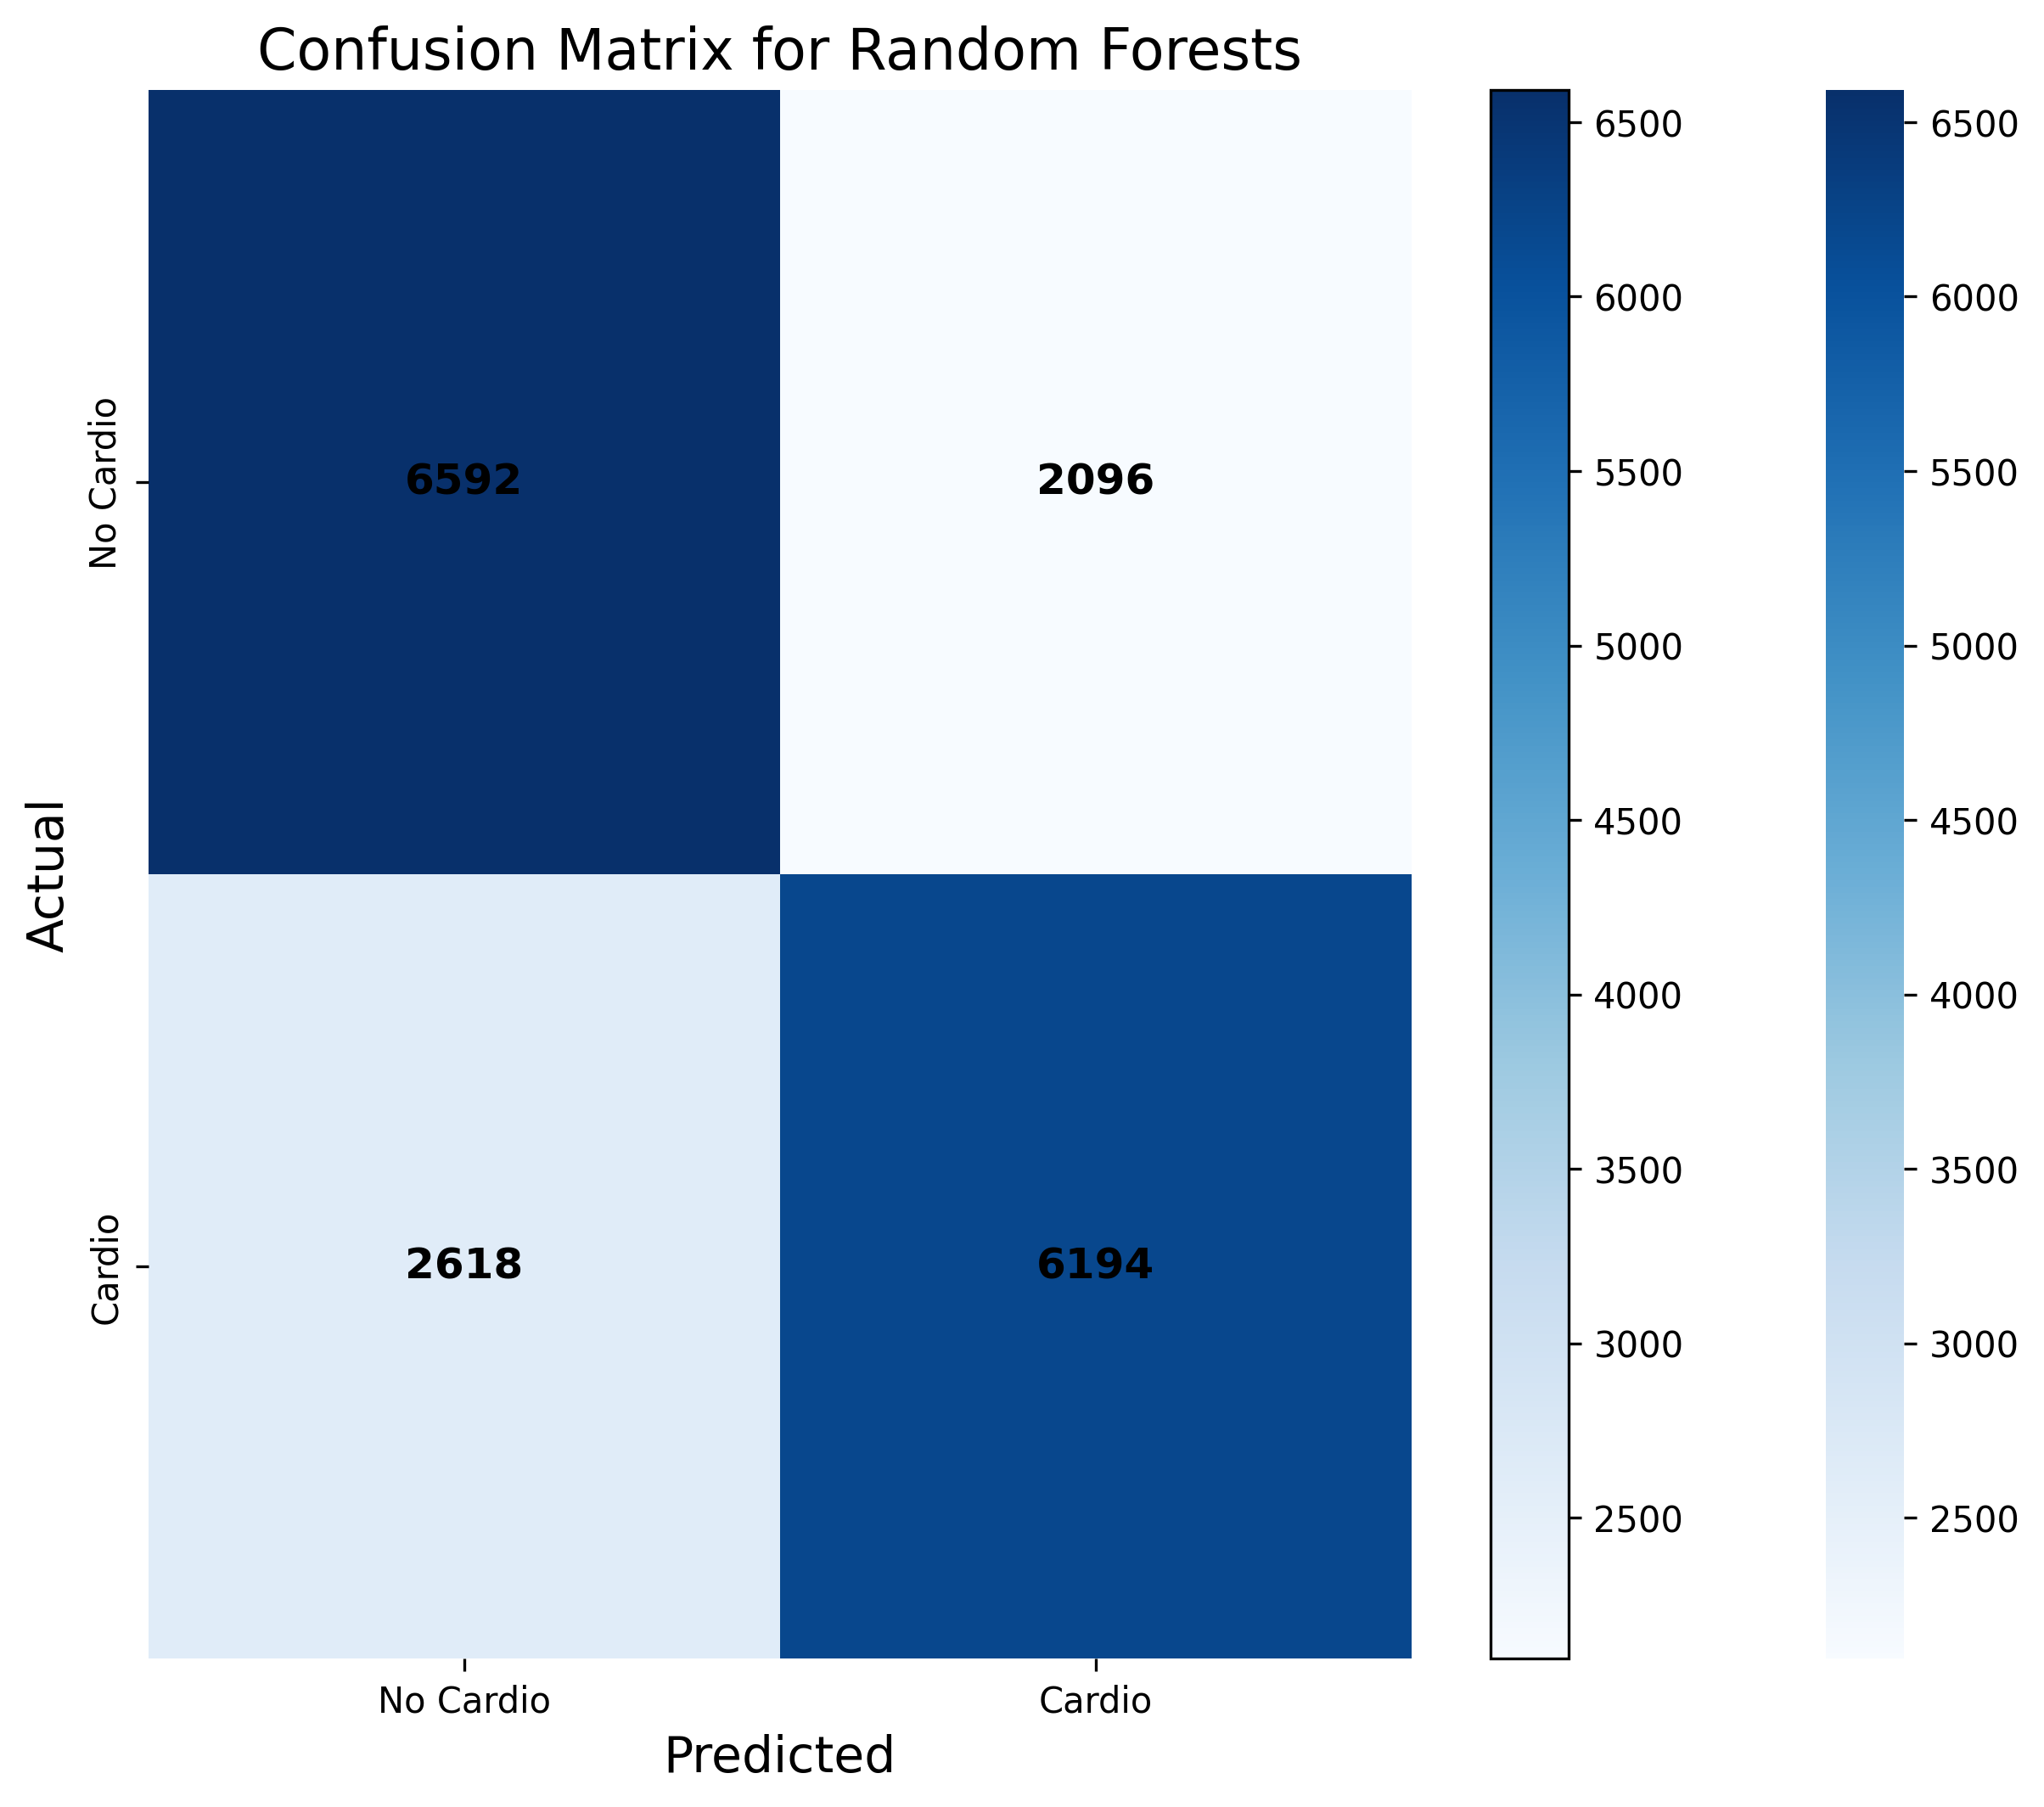

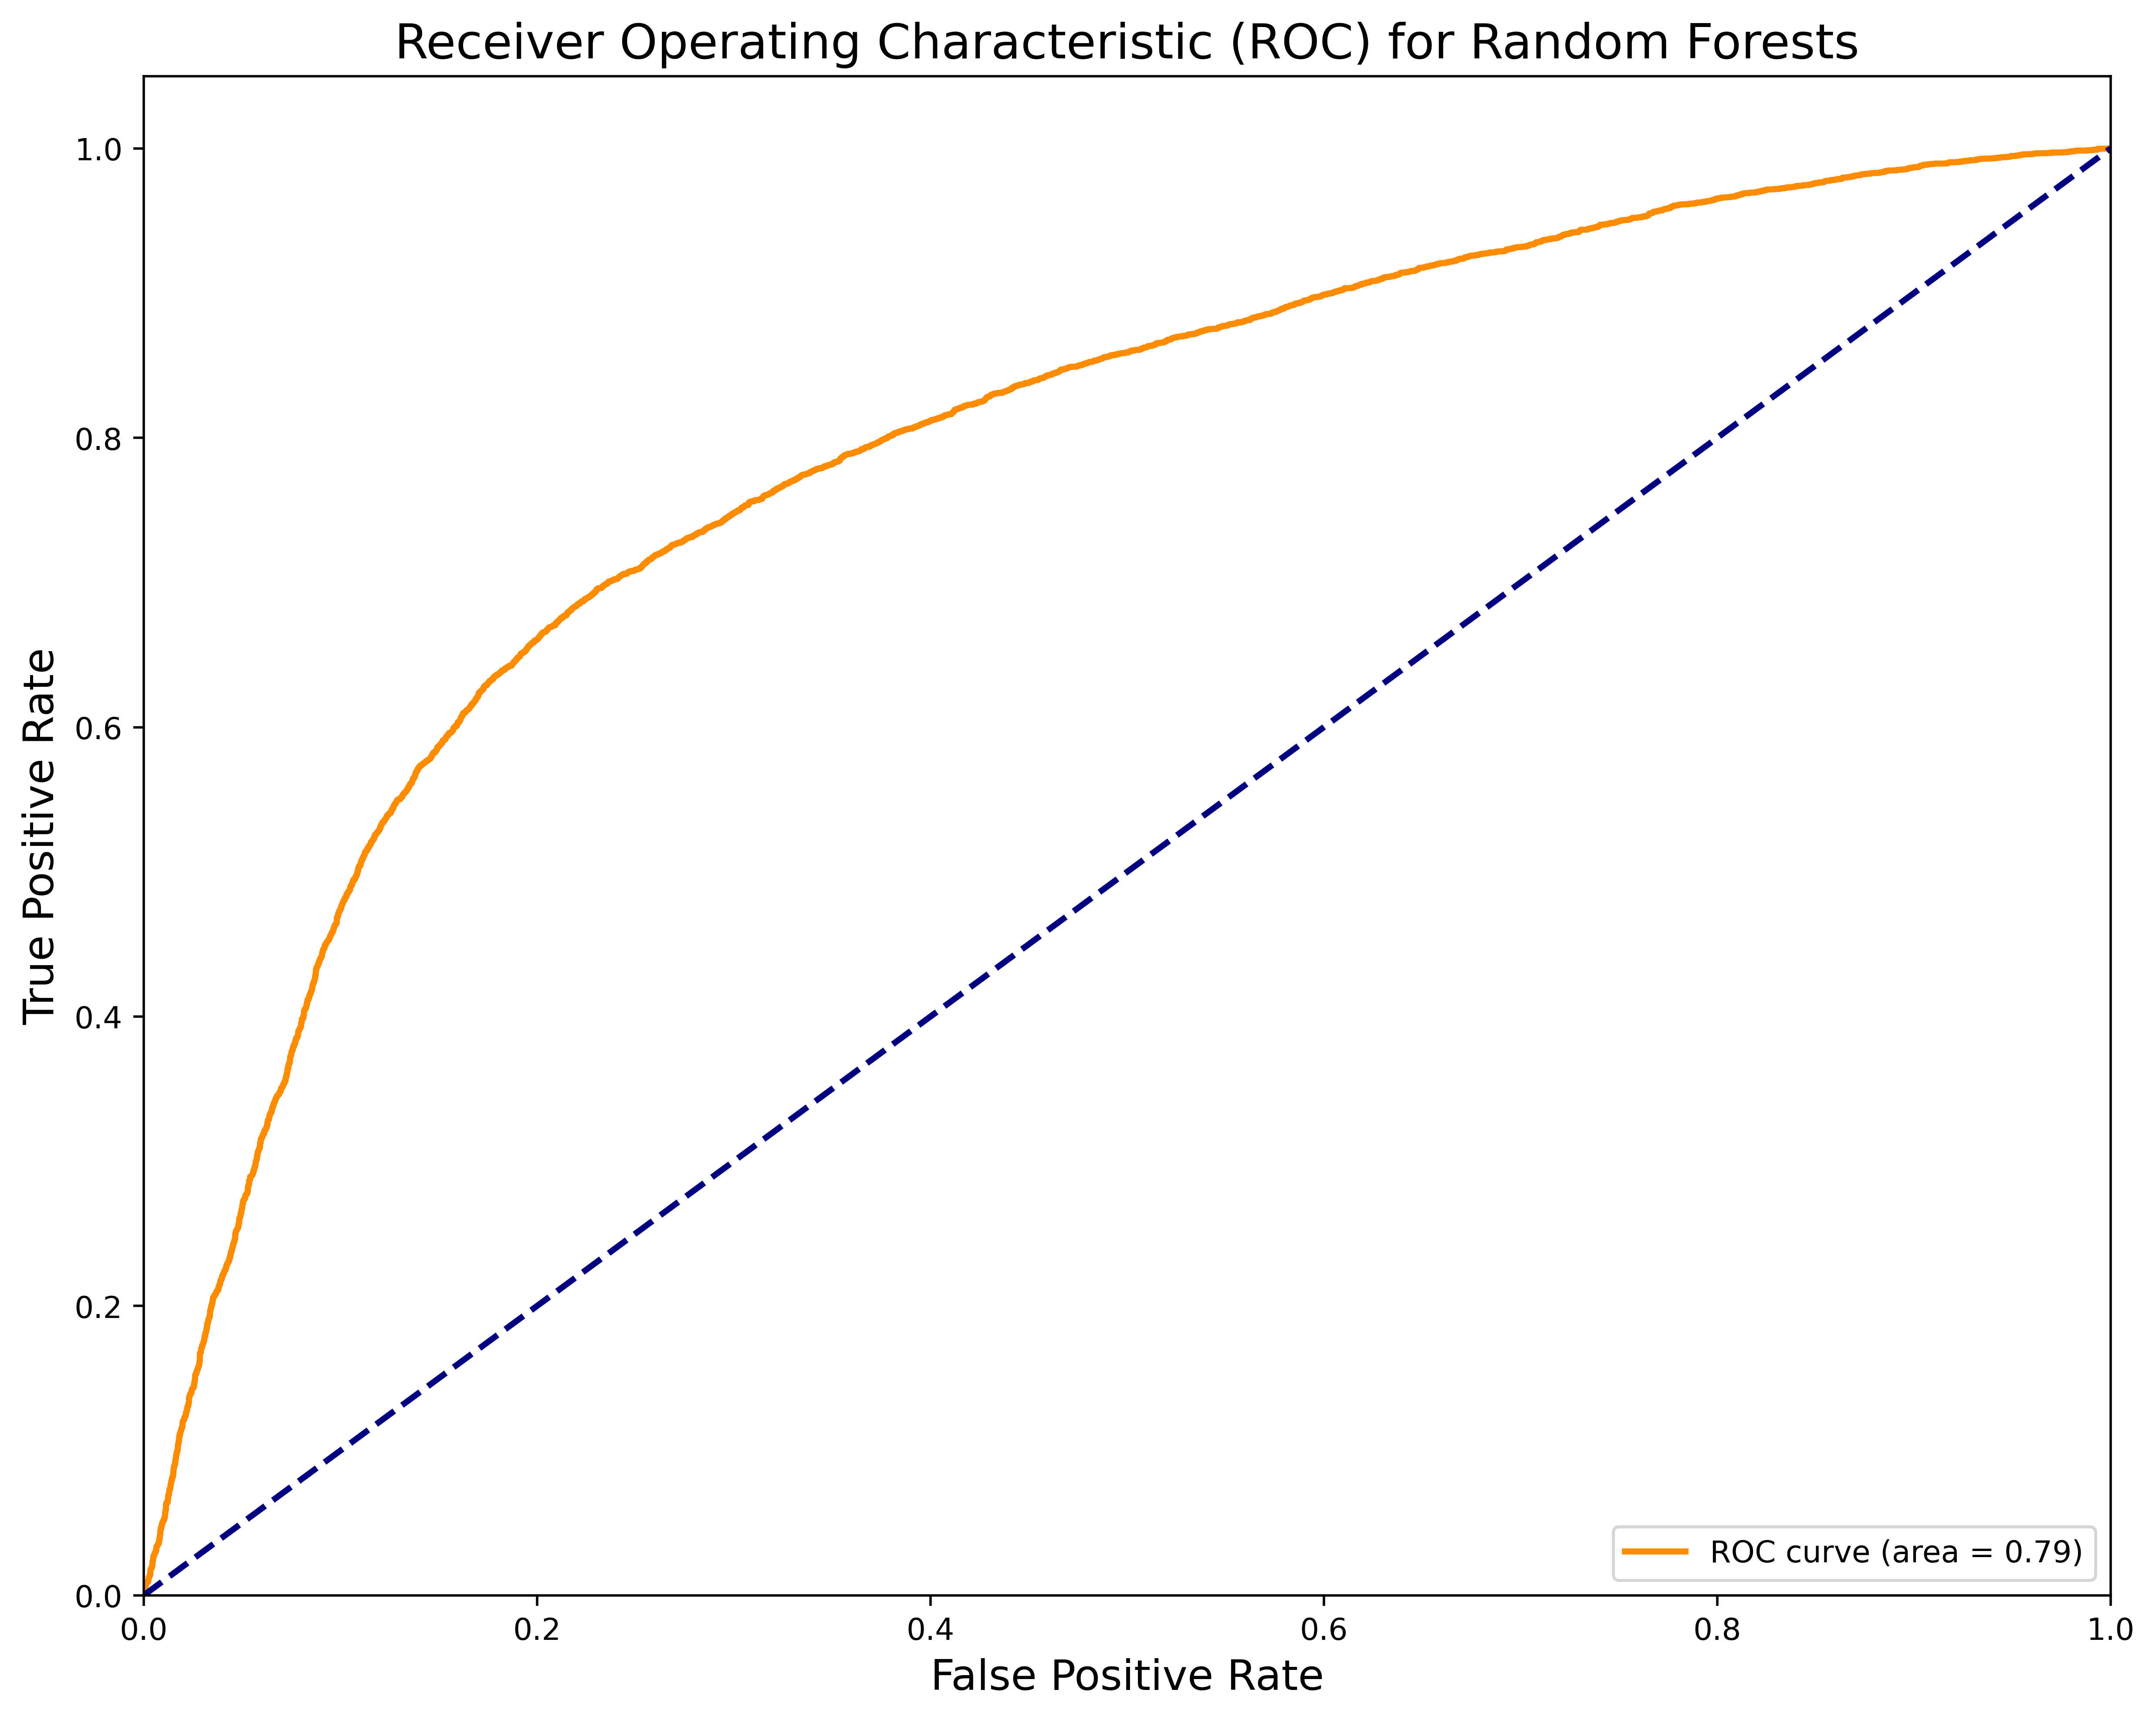

In [50]:
"""
metrics = evaluate_model(final_model_rf, X_test, y_test, model_name)
"""

with open(model_name + "/model_metrics.json", "r") as file:
        metrics = json.load(file)

df_results = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])
print(df_results)

# Plotting
if 'confusion_matrix' in metrics:
    plot_confusion_matrix(metrics['confusion_matrix'], ['No Cardio', 'Cardio'], model_name)
if 'roc_curve' in metrics:
    fpr = np.array(metrics['roc_curve']['fpr'])
    tpr = np.array(metrics['roc_curve']['tpr'])
    plot_roc_curve(fpr, tpr, model_name)

### 6.2. ADABOOST

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split

# Define the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=42)

# Define hyperparameters to tune
param_dist = {
    'n_estimators': [500, 700, 900],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    adaboost_model,
    param_distributions=param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='accuracy',  # You can use other scoring metrics based on your problem
    cv=3,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1
)

# Fit the RandomizedSearchCV object on the training data
random_search.fit(X_train, y_train)

# Get the best parameters from the search
best_params = random_search.best_params_

# Print the best parameters
print("Best Hyperparameters:")
print(best_params)

In [ ]:
# Use the best parameters to create the final AdaBoost model
final_model_adaboost = AdaBoostClassifier(random_state=42, **best_params)

# Train the final model
final_model_adaboost.fit(X_train, y_train)



In [ ]:
# Predict on the test set
y_pred = final_model_adaboost.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"\nROC AUC Score: {roc_auc}")

conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix in a graphical format
labels = ["No Cardio", "Cardio"]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 6.3. XGBOOST

In [ ]:
# Import libraries

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc
from xgboost import XGBClassifier
import shap

#### 6.3.2. Hyperparameter Tuning Function

In [ ]:
def tune_hyperparameters(X_train, y_train, param_dist, n_iter=10, cv=3, scoring='accuracy'):
    xgboost_model = XGBClassifier(random_state=42)
    random_search = RandomizedSearchCV(xgboost_model, param_distributions=param_dist, 
                                       n_iter=n_iter, scoring=scoring, cv=cv, 
                                       random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    return random_search.best_params_

#### 6.3.3. Model Training Function



In [ ]:
def train_model(X_train, y_train, best_params):
    final_model = XGBClassifier(random_state=42, **best_params)
    final_model.fit(X_train, y_train)
    importance = final_model.feature_importances_
    return final_model, importance

#### 6.3.4. Model Evaluation Function

In [ ]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    metrics = {
        "classification_report": classification_report(y_test, y_pred),
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "roc_auc_score": roc_auc_score(y_test, y_pred),
        "precision_recall_auc": auc(recall, precision)  # Ensure recall and precision are correctly ordered
    }
    return metrics

#### 6.3.5. Model Explainability with SHAP Function

In [ ]:
# Define the SHAP model explainability function
def model_explainability(model, X_train):
    explainer = shap.Explainer(model)
    shap_values = explainer(X_train)
    shap.summary_plot(shap_values, X_train)

#### 6.3.6. Visualization Function

In [ ]:
# Define the visualization function for the confusion matrix
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

#### 6.3.7. Ensemble Learning Function

In [ ]:
# Define the ensemble learning function
def ensemble_models(X_train, y_train, models):
    ensemble = VotingClassifier(estimators=models, voting='soft')
    ensemble.fit(X_train, y_train)
    return ensemble

#### 6.3.8. Execution Workflow

In [ ]:
# Execute the workflow
# Assuming X_train, X_test, y_train, y_test are already defined

# Hyperparameter tuning with a reduced parameter grid and fewer iterations
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'min_child_weight': [1, 3]
}

# Tune hyperparameters
best_params = tune_hyperparameters(X_train, y_train, param_dist, n_iter=5, cv=2)
print("Best Hyperparameters:", best_params)


# Model training
final_model, importance = train_model(X_train, y_train, best_params)

# Ensemble learning
ensemble = ensemble_models(X_train, y_train, [('xgb', final_model), 
                                              ('rf', RandomForestClassifier()), 
                                              ('lr', LogisticRegression())])

# Model evaluation
evaluation_metrics = evaluate_model(ensemble, X_test, y_test)
model_explainability(final_model, X_train)

# Results and visualization
print("\nClassification Report:\n", evaluation_metrics['classification_report'])
print("\nConfusion Matrix:\n", evaluation_metrics['confusion_matrix'])
print("\nROC AUC Score:", evaluation_metrics['roc_auc_score'])
plot_confusion_matrix(evaluation_metrics['confusion_matrix'], labels=["No Cardio", "Cardio"])

### Ensemble Model

#### Import Libraries for Ensemble

In [ ]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#### Ensemble Learning Function

In [ ]:
def ensemble_models(X_train, y_train, models):
    ensemble = VotingClassifier(estimators=models, voting='soft')
    ensemble.fit(X_train, y_train)
    return ensemble